# Amazon_Reviews_Sentiment_Analysis

### Name : Hareesh Devaba Bhittam

- Required Libraries / Basic Dependencies :

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

import nltk
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix, classification_report


#### Data Preparation :
> #### DataSet

In [2]:
df = pd.read_csv("Amazon Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.shape

(568454, 10)

In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

## Basic Data Processing :

In [6]:
df.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

In [7]:
df['Text'].nunique()

393579

In [8]:
df['Summary'].nunique()

295742

- Cleaning the data :

In [9]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [10]:
df.dropna(inplace= True)


In [11]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

- Remove Columns :

In [12]:
df = df.drop(['HelpfulnessNumerator','HelpfulnessDenominator','Time'], axis=1)

df.head()

,Id,ProductId,UserId,ProfileName,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...


- Merge all review text attributes (title, text description) into one attribute
- Convert the 5-star rating system into a binary recommendation rating of 1 or 0

In [13]:
df['Review'] = (df['ProfileName'].map(str) + ' ' + df['Text']).apply(lambda row: row.strip())
df['Rating'] = [1 if Score > 3 else 0 for Score in df['Score']]
df = df[['Review','Rating']]

df.head()

,Review,Rating
0,delmartian I have bought several of the Vitali...,1
1,dll pa Product arrived labeled as Jumbo Salted...,0
2,"Natalia Corres ""Natalia Corres"" This is a conf...",1
3,Karl If you are looking for the secret ingredi...,0
4,"Michael D. Bigham ""M. Wassir"" Great taffy at a...",1


##### Remove all records with no review text.

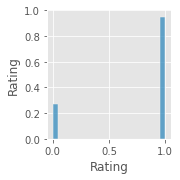

In [14]:
sns.pairplot(df)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

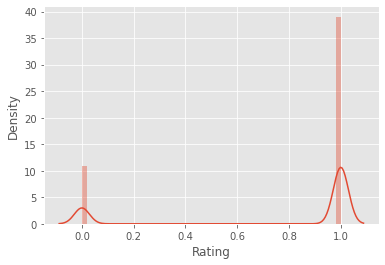

In [15]:
sns.distplot(df['Rating'])

In [16]:
df = df[df['Review'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  568411 non-null  object
 1   Rating  568411 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ MB


In [17]:
rating_pct = df['Rating'].value_counts()/len(df) * 100
rating_pct

1    78.071325
0    21.928675
Name: Rating, dtype: float64

In [18]:
df['Rating'].value_counts()

1    443766
0    124645
Name: Rating, dtype: int64

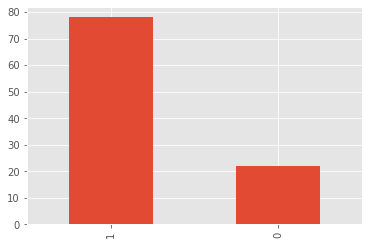

In [19]:
rating_pct.plot.bar()
plt.show()

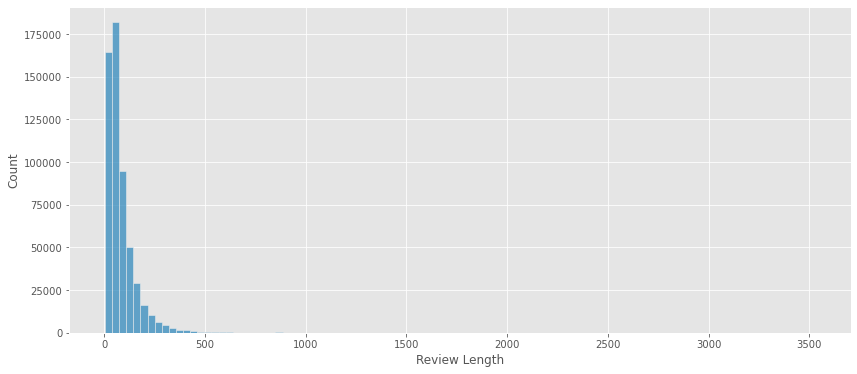

In [20]:
#words per review

plt.figure(figsize = (14,6))
WordsPerReview = df['Review'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

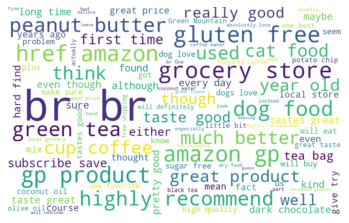

In [21]:
txt = ' '.join(review for review in df.Review)

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Split Dataset

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Review']], df['Rating'], train_size=0.80, random_state=42)

X_train.shape, X_test.shape


((454728, 1), (113683, 1))

In [23]:
len(X_train)

454728

In [24]:
len(X_test)

113683

In [25]:
from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({1: 354754, 0: 99974}), Counter({1: 89012, 0: 24671}))

# Basic NLP Count based Features :

A number of basic text based features can also be created which sometimes are helpful for improving text classification models. 
Some examples are:

- __Word Count:__ total number of words in the documents
- __Character Count:__ total number of characters in the documents
- __Average Word Density:__ average length of the words used in the documents
- __Puncutation Count:__ total number of punctuation marks in the documents
- __Upper Case Count:__ total number of upper count words in the documents
- __Title Word Count:__ total number of proper case (title) words in the documents

In [26]:
import string

X_train['char_count'] = X_train['Review'].apply(len)
X_train['word_count'] = X_train['Review'].apply(lambda x: len(x.split()))
X_train['word_density'] = X_train['char_count'] / (X_train['word_count']+1)
X_train['punctuation_count'] = X_train['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_train['title_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_train['upper_case_word_count'] = X_train['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))


X_test['char_count'] = X_test['Review'].apply(len)
X_test['word_count'] = X_test['Review'].apply(lambda x: len(x.split()))
X_test['word_density'] = X_test['char_count'] / (X_test['word_count']+1)
X_test['punctuation_count'] = X_test['Review'].apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
X_test['title_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
X_test['upper_case_word_count'] = X_test['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))

In [27]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count
438788,Jason C. Van Note I had some reservations abou...,1107,197,5.590909,28,41,12
173470,Sambient I've found my decaf!<br />I'm one of ...,1122,187,5.968085,76,26,5
440930,"NyiNya ""NyiNya"" I nevr tasted 100% Ethiopian Y...",2967,533,5.556180,138,73,12
440653,Neen23 This stuff is better than Nutella. When...,202,36,5.459459,9,7,1
313282,"LVMom ""Audrey"" This pack has a lot of the extr...",124,25,4.769231,5,4,1


### Training a Logistic Regression Model :

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1, random_state=42, solver='liblinear')

#### Model Evaluation Metrics - Quick Refresher

In [29]:
lr.fit(X_train.drop(['Review'], axis=1), y_train)
predictions = lr.predict(X_test.drop(['Review'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.35      0.00      0.01     24671
           1       0.78      1.00      0.88     89012

    accuracy                           0.78    113683
   macro avg       0.56      0.50      0.44    113683
weighted avg       0.69      0.78      0.69    113683



,0,1
0,84,24587
1,159,88853


# Leveraging Text Sentiment

Reviews are pretty subjective, opinionated and people often express stong emotions, feelings. 
This makes it a classic case where the text documents here are a good candidate for extracting sentiment as a feature.

The general expectation is that highly rated and recommended products (__label 1__) should have a __positive__ sentiment and products which are not recommended (__label 0__) should have a __negative__ sentiment.

TextBlob is an excellent open-source library for performing NLP tasks with ease, including sentiment analysis. It also an a sentiment lexicon (in the form of an XML file) which it leverages to give both polarity and subjectivity scores. 

- The polarity score is a float within the range [-1.0, 1.0]. 
- The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective. 

In [30]:
import textblob

textblob.TextBlob('This is an AMAZING pair of Jeans!').sentiment

Sentiment(polarity=0.7500000000000001, subjectivity=0.9)

In [31]:
textblob.TextBlob('I really hated this UGLY T-shirt!!').sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

# Features from Sentiment Analysis :

Remember this is unsupervised, lexicon-based sentiment analysis where we don't have any pre-labeled data saying which review migth have a positive or negative sentiment. We use the lexicon to determine this.

In [32]:
x_train_snt_obj = X_train['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_train['Polarity'] = [obj.polarity for obj in x_train_snt_obj.values]
X_train['Subjectivity'] = [obj.subjectivity for obj in x_train_snt_obj.values]

x_test_snt_obj = X_test['Review'].apply(lambda row: textblob.TextBlob(row).sentiment)
X_test['Polarity'] = [obj.polarity for obj in x_test_snt_obj.values]
X_test['Subjectivity'] = [obj.subjectivity for obj in x_test_snt_obj.values]

In [33]:
X_train.head()

,Review,char_count,word_count,word_density,punctuation_count,title_word_count,upper_case_word_count,Polarity,Subjectivity
438788,Jason C. Van Note I had some reservations abou...,1107,197,5.590909,28,41,12,0.056466,0.457763
173470,Sambient I've found my decaf!<br />I'm one of ...,1122,187,5.968085,76,26,5,0.094902,0.612607
440930,"NyiNya ""NyiNya"" I nevr tasted 100% Ethiopian Y...",2967,533,5.556180,138,73,12,0.164318,0.519372
440653,Neen23 This stuff is better than Nutella. When...,202,36,5.459459,9,7,1,0.450000,0.550000
313282,"LVMom ""Audrey"" This pack has a lot of the extr...",124,25,4.769231,5,4,1,0.083333,0.566667


## Model Training and Evaluation :

In [34]:
lr.fit(X_train.drop(['Review'], axis=1), y_train, )
predictions = lr.predict(X_test.drop(['Review'], axis=1))

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.22      0.34     24671
           1       0.82      0.97      0.89     89012

    accuracy                           0.81    113683
   macro avg       0.74      0.60      0.61    113683
weighted avg       0.79      0.81      0.77    113683



,0,1
0,5548,19123
1,2755,86257


Interesting ! Looks like we are now able to predict 22% of the total number of bad or negative rated products now! Precision is quite good at 67%

F1-Score for bad reviews is now 34% and good reviews is 89%

This brings our overall F1-Score to 77% which is quite good.